In [1613]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

## Tentang dataset

- Brand : The name of the laptop brand
- Model : The specific model or series of the laptopp
- Price : The price of the laptop in Indian rupeese
- Rating : The rating assigned to each laptop based on its specificationso
- Processor brand : The brand of the processor used in the laptopp
- Processor tier : The performance tier or category of the processore
- Number of Cores : The number of processing cores in the processorc
- Number of Threads : The number of threads supported by the processoro
- Ram memory : The amount of RAM used in the laptope
- Primary storage type : The type of primary storage (e.g., HDD, SSD).
- Primary storage capacity : The capacity of the primary storage in the laptop.
- Secondary storage type : The type of secondary storage, if available.
- Secondary storage capacity : The capacity of the secondary storage in the laptop.
- GPU brand : The brand of the graphics processing unit (GPU).
- GPU type : The type of the GPU.
- Is Touch screen : Indicates whether the laptop has a touch screen feature.
- Display size : The size of the laptop display in inches.
- Resolution width : The width resolution of the display.
- Resolution height : The height resolution of the display.
- OS : The operating system installed on the laptop.
- Year of warranty : The duration of the warranty provided for the laptop, usually in years

## Yang akan dilakukan
1. Prepare Data
2. Clearing Data
3. Exploratory Data Analyze (EDA)
4. Preprocessing data
5. Modelling
6. Evaluasi Model

### 1. Prepare Data

In [1618]:
df = pd.read_csv('laptops.csv')
df.head().T

,0,1,2,3,4
index,1,2,3,4,5
brand,tecno,tecno,hp,acer,lenovo
Model,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...
Price,23990,35990,51100,39990,28580
Rating,63,67,73,62,62
processor_brand,intel,intel,amd,intel,amd
processor_tier,core i3,core i7,ryzen 5,core i5,ryzen 3
num_cores,2,4,6,12,4
num_threads,4,8,12,16,8
ram_memory,8,16,8,8,8


### 2. Clearing Data

In [1620]:
# cek apakah ada Missing Value
df.isna().sum()

index                         0
brand                         0
Model                         0
Price                         0
Rating                        0
processor_brand               0
processor_tier                0
num_cores                     0
num_threads                   0
ram_memory                    0
primary_storage_type          0
primary_storage_capacity      0
secondary_storage_type        0
secondary_storage_capacity    0
gpu_brand                     0
gpu_type                      0
is_touch_screen               0
display_size                  0
resolution_width              0
resolution_height             0
OS                            0
year_of_warranty              0
dtype: int64

In [1621]:
# cek apakah ada duplicasi data
df.duplicated().sum()

0

In [1622]:
# cek Unique values
df.nunique()

index                         991
brand                          26
Model                         991
Price                         545
Rating                         54
processor_brand                 4
processor_tier                 15
num_cores                      12
num_threads                    15
ram_memory                      7
primary_storage_type            2
primary_storage_capacity        7
secondary_storage_type          2
secondary_storage_capacity      4
gpu_brand                       5
gpu_type                        3
is_touch_screen                 2
display_size                   20
resolution_width               20
resolution_height              22
OS                              7
year_of_warranty                4
dtype: int64

In [1623]:
len(df)

991

#### Setelah pengecekan kita dapat melihat bahwa data sudah bersih

### 3. Exploratory Data Analyze (EDA)

In [1626]:
df.head().T

,0,1,2,3,4
index,1,2,3,4,5
brand,tecno,tecno,hp,acer,lenovo
Model,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...
Price,23990,35990,51100,39990,28580
Rating,63,67,73,62,62
processor_brand,intel,intel,amd,intel,amd
processor_tier,core i3,core i7,ryzen 5,core i5,ryzen 3
num_cores,2,4,6,12,4
num_threads,4,8,12,16,8
ram_memory,8,16,8,8,8


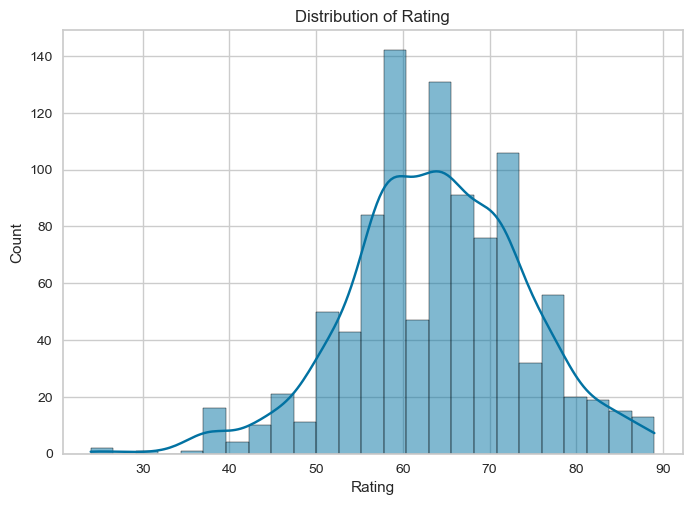

In [1627]:
# Lihat Distribusi Rating
sns.histplot(data=df, x = 'Rating', kde=True)
plt.title("Distribution of Rating")
plt.show()

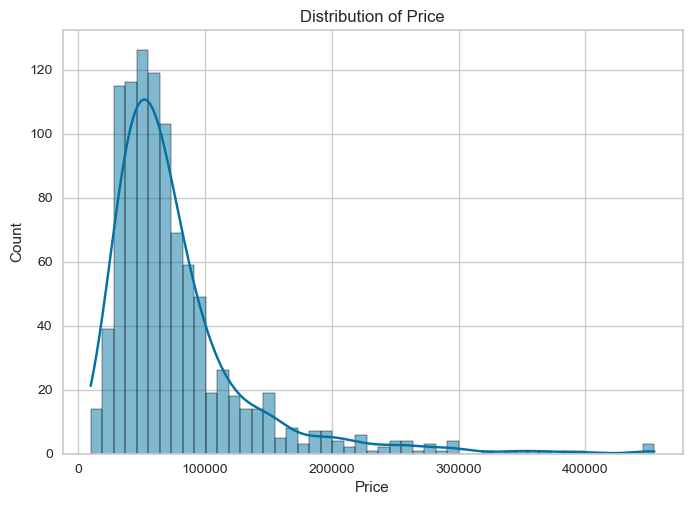

In [1628]:
# lihat distribusi dari harga
sns.histplot(data=df, x = 'Price', kde=True)
plt.title("Distribution of Price")
plt.show()

In [1629]:
price_tier_avg = df.groupby('processor_tier')['Price'].mean().reset_index()
price_tier_avg.head()

,processor_tier,Price
0,celeron,23138.550000
1,core i3,38412.984252
2,core i5,66845.158209
3,core i7,117426.295597
4,core i9,236658.810811


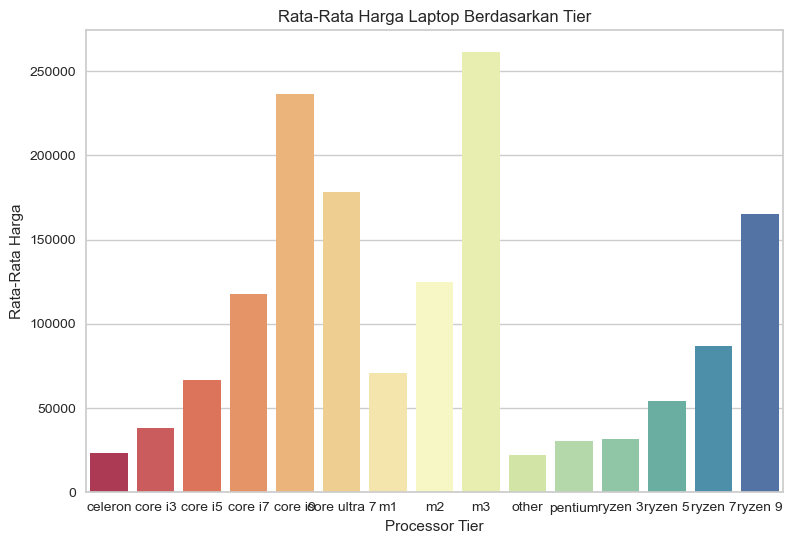

In [1630]:
# melihat rata rata harga laptop berdasarkan `processor_tier`
plt.figure(figsize=(9,6))
sns.barplot(x='processor_tier', y='Price', data=price_tier_avg, hue='processor_tier', palette='Spectral')
plt.title('Rata-Rata Harga Laptop Berdasarkan Tier')
plt.xlabel('Processor Tier')
plt.ylabel('Rata-Rata Harga')
plt.show()

In [1631]:
## mari lihat harga laptop berdasarkan GPU
price_gpu_avg = df.groupby(['gpu_brand', 'gpu_type'])['Price'].mean().reset_index()
price_gpu_avg.head()

,gpu_brand,gpu_type,Price
0,amd,dedicated,60154.857143
1,amd,integrated,47130.934641
2,apple,apple,193875.333333
3,arm,integrated,20558.000000
4,intel,dedicated,178046.666667


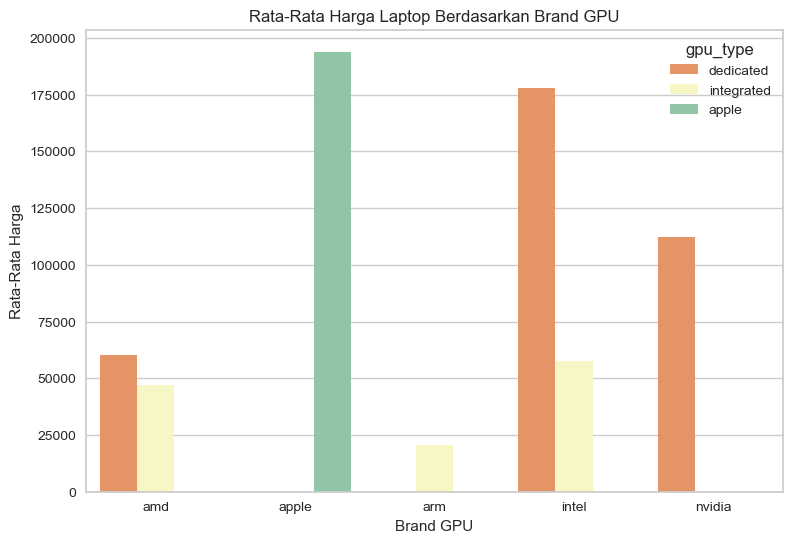

In [1632]:
# Plot 1: Rata-Rata Harga Laptop Berdasarkan Brand GPU
plt.figure(figsize=(9,6))
sns.barplot(x='gpu_brand', y='Price', hue='gpu_type', data=price_gpu_avg, palette='Spectral')
plt.title('Rata-Rata Harga Laptop Berdasarkan Brand GPU')
plt.xlabel('Brand GPU')
plt.ylabel('Rata-Rata Harga')
plt.show()

In [1633]:
# menampilkan top 10 brand
top10_brand = pd.DataFrame(df['brand'].value_counts())[:10].reset_index()
top10_brand.head()

,brand,count
0,asus,210
1,hp,205
2,lenovo,201
3,dell,106
4,msi,90


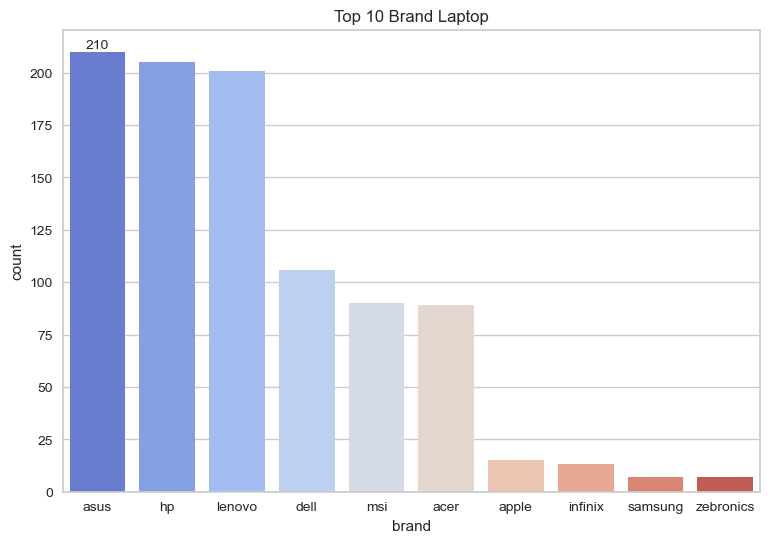

In [1634]:
plt.figure(figsize=(9,6))
ax = sns.barplot(x='brand', y='count', hue='brand', data=top10_brand, palette='coolwarm')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Top 10 Brand Laptop')
plt.show()

In [1635]:
# cek harga laptop berdsarkan RAM
ram_price_avg = df.groupby('ram_memory')['Price'].mean().reset_index()
ram_price_avg.head()

,ram_memory,Price
0,2,9800.000000
1,4,53641.600000
2,8,49675.014925
3,12,46990.000000
4,16,87732.927203


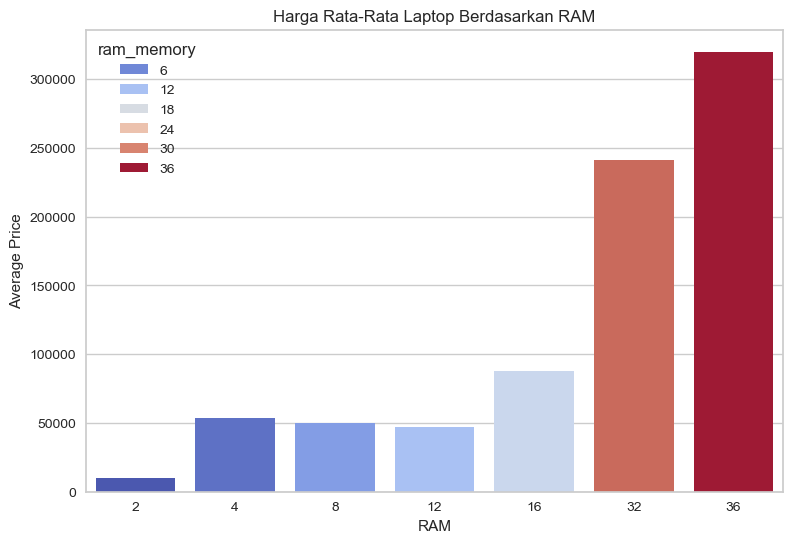

In [1636]:
# Menampilkan harga rata - ratalaptop berdasarkan RAM
plt.figure(figsize=(9,6))
sns.barplot(x='ram_memory', y='Price', data=ram_price_avg, hue='ram_memory', palette='coolwarm')
plt.title('Harga Rata-Rata Laptop Berdasarkan RAM')
plt.xlabel('RAM')
plt.ylabel('Average Price')
plt.show()

In [1637]:
ps_price_avg = df.groupby('primary_storage_capacity')['Price'].mean().reset_index()
ps_price_avg.head()

,primary_storage_capacity,Price
0,32,12395.000000
1,64,19598.111111
2,128,21675.818182
3,256,38461.133333
4,512,62780.728814


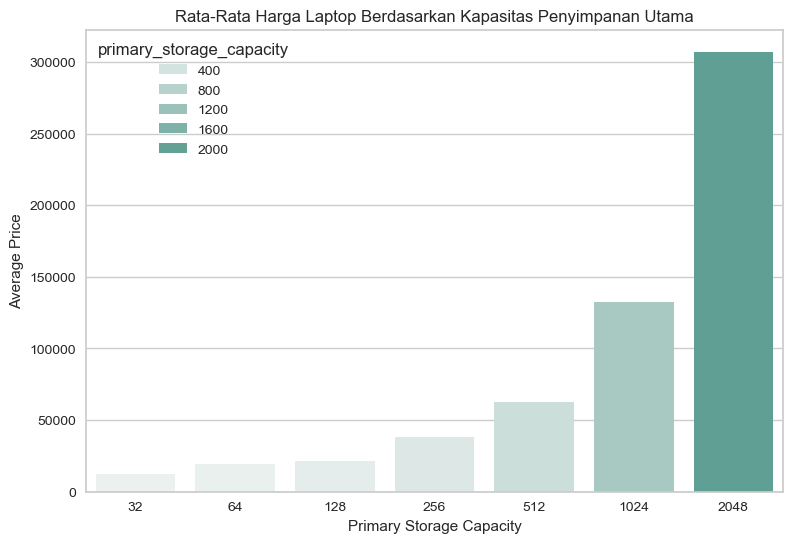

In [1638]:
# Menampilkan rata - rata harga laptop berdasarkan primary_storage_capacity
plt.figure(figsize=(9,6))
sns.barplot(x='primary_storage_capacity', y='Price', hue='primary_storage_capacity', palette="light:#5A9", data=ps_price_avg)
plt.title('Rata-Rata Harga Laptop Berdasarkan Kapasitas Penyimpanan Utama')
plt.xlabel('Primary Storage Capacity')
plt.ylabel('Average Price')
plt.show()

### Preprocessing Data
Pre-processing adalah teknik untuk menyiapkan data agar lebih siap untuk dilakukan lebih lanjut dalam rangka ekstraksi pengetahuan

##### Membuat salinan data

In [1641]:
data = df.copy()
data.head().T

,0,1,2,3,4
index,1,2,3,4,5
brand,tecno,tecno,hp,acer,lenovo
Model,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...
Price,23990,35990,51100,39990,28580
Rating,63,67,73,62,62
processor_brand,intel,intel,amd,intel,amd
processor_tier,core i3,core i7,ryzen 5,core i5,ryzen 3
num_cores,2,4,6,12,4
num_threads,4,8,12,16,8
ram_memory,8,16,8,8,8


In [1642]:
# Cek info data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       991 non-null    int64  
 1   brand                       991 non-null    object 
 2   Model                       991 non-null    object 
 3   Price                       991 non-null    int64  
 4   Rating                      991 non-null    int64  
 5   processor_brand             991 non-null    object 
 6   processor_tier              991 non-null    object 
 7   num_cores                   991 non-null    int64  
 8   num_threads                 991 non-null    int64  
 9   ram_memory                  991 non-null    int64  
 10  primary_storage_type        991 non-null    object 
 11  primary_storage_capacity    991 non-null    int64  
 12  secondary_storage_type      991 non-null    object 
 13  secondary_storage_capacity  991 non

## Cek Tipe data dan Convert data menggunakan `pd.api.types_is_dtype`
cek link berikut untuk mempelajarinya lebih lanjut:
https://pandas.pydata.org/docs/reference/api/pandas.api.types.is_bool_dtype.html

In [1643]:
# cek data categorical
for label, konten in data.items():
    if pd.api.types.is_object_dtype(konten):
        print(label)

brand
Model
processor_brand
processor_tier
primary_storage_type
secondary_storage_type
gpu_brand
gpu_type
OS
year_of_warranty


In [1644]:
# cek data Numerik
for label, konten in data.items():
    if pd.api.types.is_numeric_dtype(konten):
        print(label)

index
Price
Rating
num_cores
num_threads
ram_memory
primary_storage_capacity
secondary_storage_capacity
is_touch_screen
display_size
resolution_width
resolution_height


##### Convert data Objek menjadi Category

In [1646]:
# cek data categorical
for label, konten in data.items():
    if pd.api.types.is_object_dtype(konten):
        data[label] = konten.astype('category')

In [1647]:
# cek data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   index                       991 non-null    int64   
 1   brand                       991 non-null    category
 2   Model                       991 non-null    category
 3   Price                       991 non-null    int64   
 4   Rating                      991 non-null    int64   
 5   processor_brand             991 non-null    category
 6   processor_tier              991 non-null    category
 7   num_cores                   991 non-null    int64   
 8   num_threads                 991 non-null    int64   
 9   ram_memory                  991 non-null    int64   
 10  primary_storage_type        991 non-null    category
 11  primary_storage_capacity    991 non-null    int64   
 12  secondary_storage_type      991 non-null    category
 13  secondary_storage_ca

In [1648]:
# cek data categorical
for label, konten in data.items():
    if isinstance(konten.dtype, pd.CategoricalDtype):
        data[label] = pd.Categorical(konten).codes

In [1649]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       991 non-null    int64  
 1   brand                       991 non-null    int8   
 2   Model                       991 non-null    int16  
 3   Price                       991 non-null    int64  
 4   Rating                      991 non-null    int64  
 5   processor_brand             991 non-null    int8   
 6   processor_tier              991 non-null    int8   
 7   num_cores                   991 non-null    int64  
 8   num_threads                 991 non-null    int64  
 9   ram_memory                  991 non-null    int64  
 10  primary_storage_type        991 non-null    int8   
 11  primary_storage_capacity    991 non-null    int64  
 12  secondary_storage_type      991 non-null    int8   
 13  secondary_storage_capacity  991 non

In [1650]:
data['is_touch_screen'] = data['is_touch_screen'].astype('int')

In [1651]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       991 non-null    int64  
 1   brand                       991 non-null    int8   
 2   Model                       991 non-null    int16  
 3   Price                       991 non-null    int64  
 4   Rating                      991 non-null    int64  
 5   processor_brand             991 non-null    int8   
 6   processor_tier              991 non-null    int8   
 7   num_cores                   991 non-null    int64  
 8   num_threads                 991 non-null    int64  
 9   ram_memory                  991 non-null    int64  
 10  primary_storage_type        991 non-null    int8   
 11  primary_storage_capacity    991 non-null    int64  
 12  secondary_storage_type      991 non-null    int8   
 13  secondary_storage_capacity  991 non

In [1652]:
data.head()

,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
0,1,21,970,23990,63,2,1,2,4,8,...,0,0,3,2,0,15.6,1920,1080,6,0
1,2,21,971,35990,67,2,3,4,8,16,...,0,0,3,2,0,15.6,1920,1080,6,0
2,3,10,620,51100,73,0,12,6,12,8,...,0,0,0,1,0,15.6,1920,1080,6,0
3,4,0,55,39990,62,2,2,12,16,8,...,0,0,3,2,0,14.0,1920,1080,6,0
4,5,14,838,28580,62,0,11,4,8,8,...,0,0,0,2,0,15.6,1920,1080,6,0


##### Feature Selection
kita akan memilih kolom yang paling digunakan

In [1654]:
df_selected = data[ [
    'brand', 'Price', 'Rating','processor_brand', 'processor_tier',
    'ram_memory', 'primary_storage_type', 'primary_storage_capacity',
    'gpu_brand', 'gpu_type', 'display_size', 'resolution_width',
    'resolution_height', 'OS', 'year_of_warranty', 'is_touch_screen'
]]
df_selected.head()

,brand,Price,Rating,processor_brand,processor_tier,ram_memory,primary_storage_type,primary_storage_capacity,gpu_brand,gpu_type,display_size,resolution_width,resolution_height,OS,year_of_warranty,is_touch_screen
0,21,23990,63,2,1,8,1,512,3,2,15.6,1920,1080,6,0,0
1,21,35990,67,2,3,16,1,1024,3,2,15.6,1920,1080,6,0,0
2,10,51100,73,0,12,8,1,512,0,1,15.6,1920,1080,6,0,0
3,0,39990,62,2,2,8,1,512,3,2,14.0,1920,1080,6,0,0
4,14,28580,62,0,11,8,1,512,0,2,15.6,1920,1080,6,0,0


##### Cek apakah ada Outlier pada data

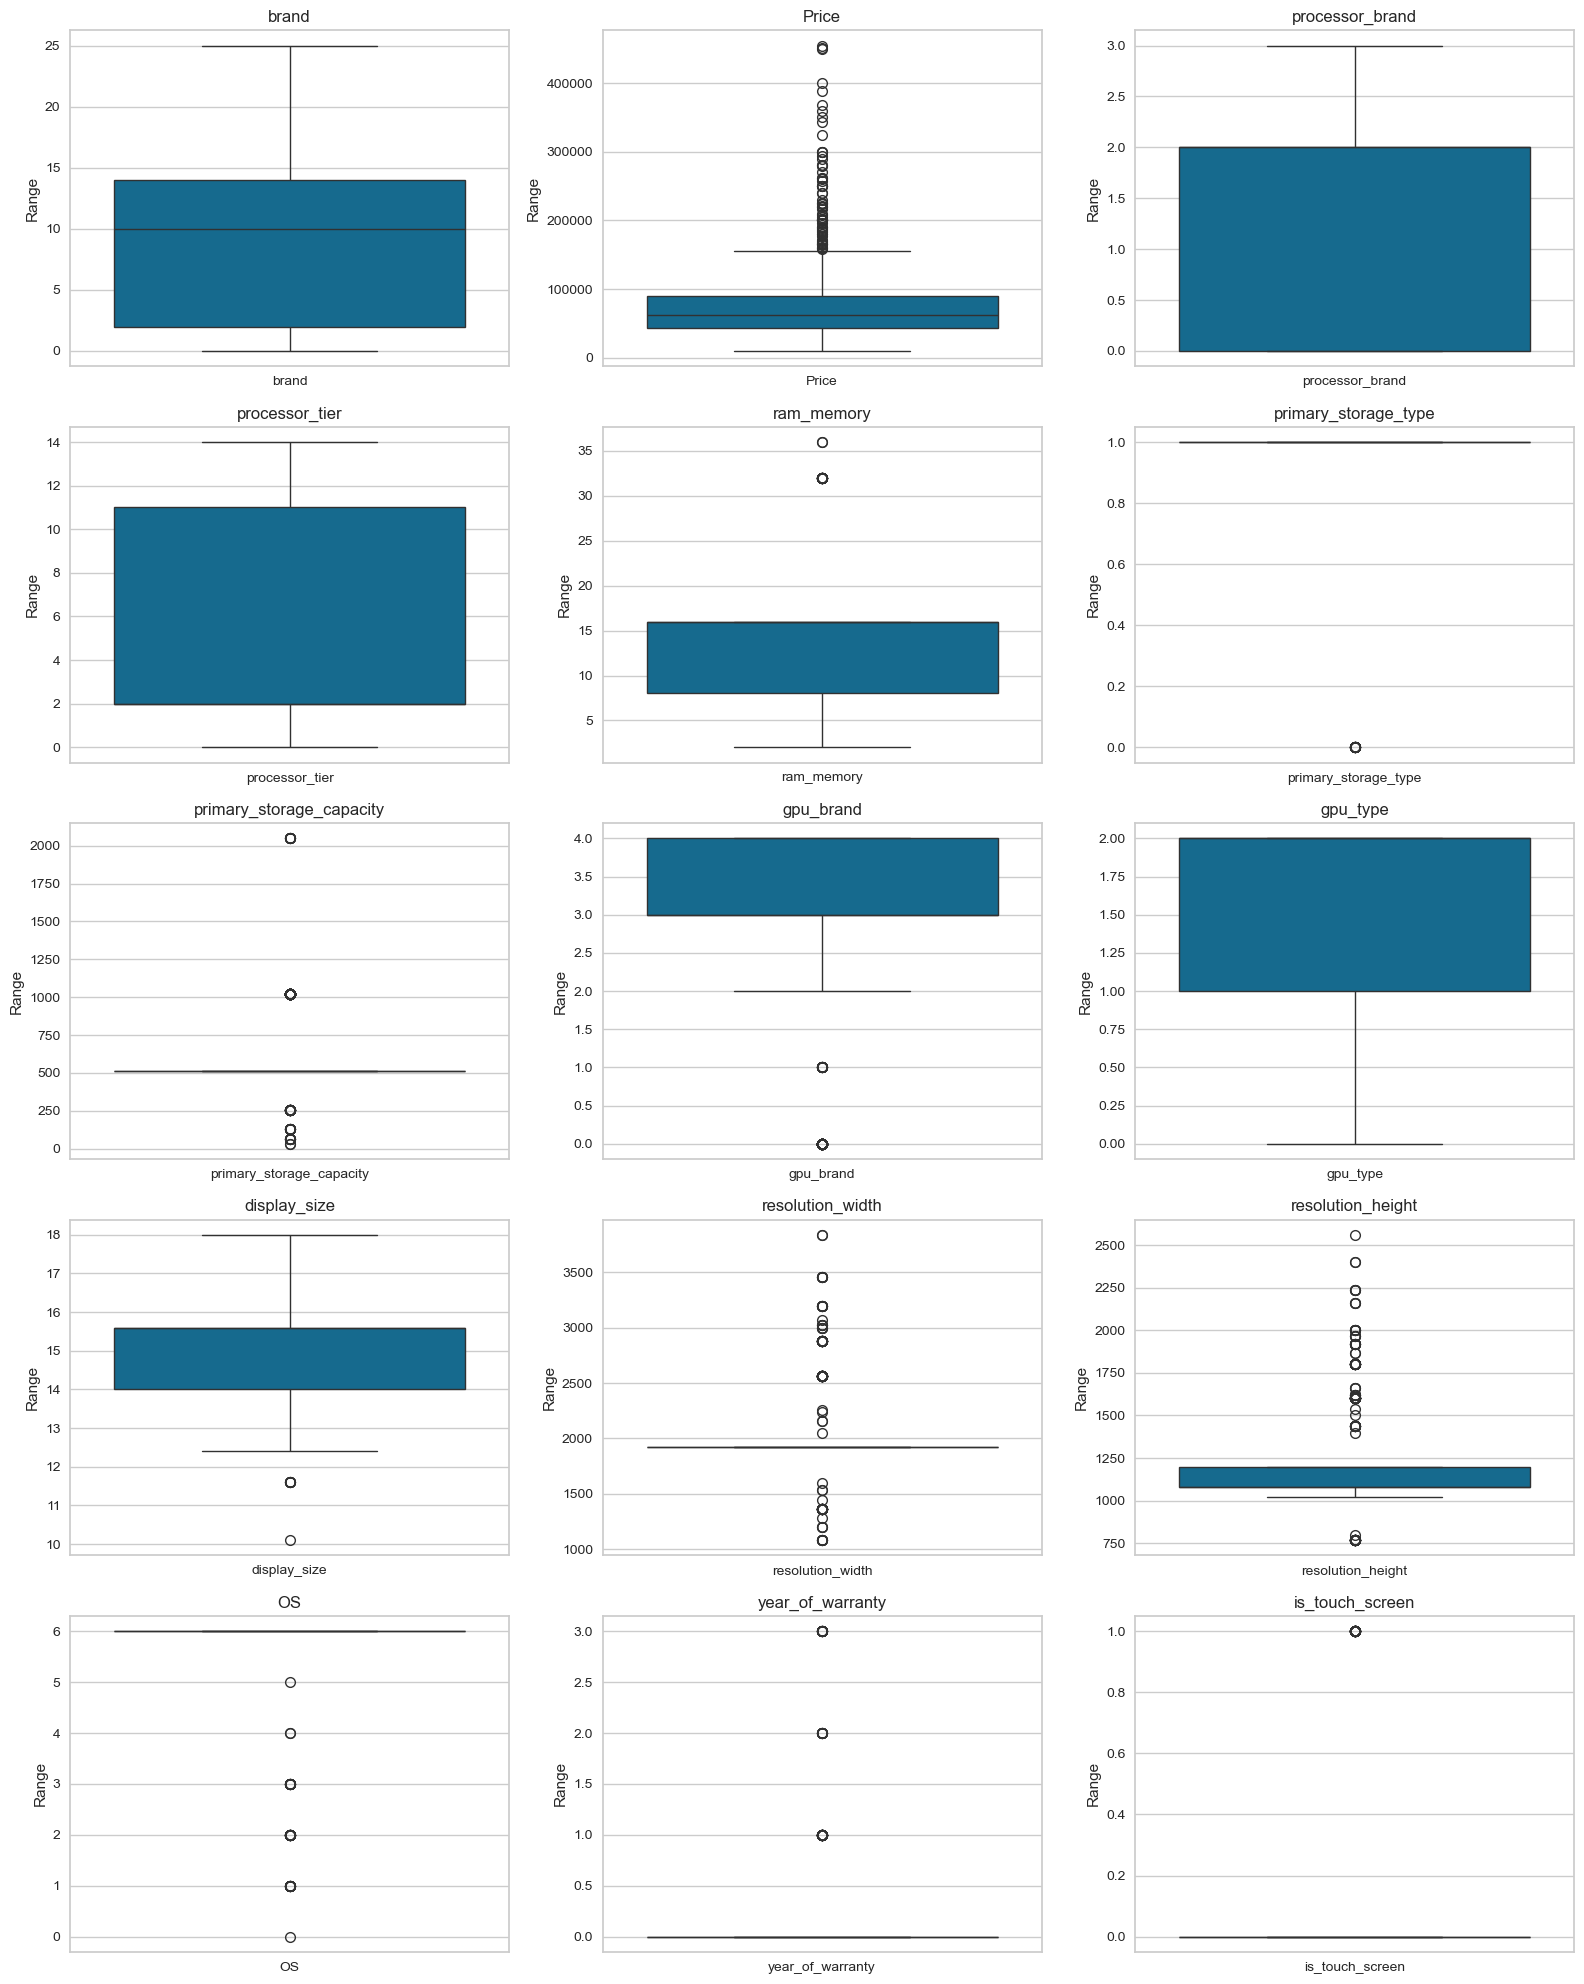

In [1656]:
# cek outlier
data_rmv = df_selected

# Ubah data_rmv menjadi format panjang menggunakan pd.melt
melted_data = pd.melt(data_rmv, var_name="Attributes", value_name="Range")

# Tentukan jumlah kolom dan baris untuk subplot
num_attributes = len(attributes)
cols = 3  # Misalnya, kita ingin 3 plot per baris
rows = (num_attributes + cols - 1) // cols  # Ini menggantikan math.ceil

# Buat subplots dengan ukuran yang sesuai
fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 4))  # Adjusting height for better visibility
axes = axes.flatten()  # Flatten to easily iterate over

# Plot setiap atribut dalam subplot yang berbeda
for i, attribute in enumerate(attributes):
    sns.boxplot(x="Attributes", y="Range", data=melted_data[melted_data["Attributes"] == attribute], ax=axes[i])
    axes[i].set_title(f'{attribute}')
    axes[i].set_xlabel('')  # Remove x-axis label for clarity
    axes[i].set_ylabel('Range')

# Hapus subplot yang kosong jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Atur tata letak agar tidak saling tumpang tindih
plt.tight_layout()
plt.show()

##### Handle Outlier menggunakan IQR

In [1658]:
# Fungsi untuk menghapus outliers berdasarkan IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= Q1 - 1.5*IQR) & (df[column] <= Q3 + 1.5*IQR)]

In [1659]:
# Hapus outlier pada kolom Price
df_selected = remove_outliers(df_selected, 'Price')
df_selected.head()

,brand,Price,Rating,processor_brand,processor_tier,ram_memory,primary_storage_type,primary_storage_capacity,gpu_brand,gpu_type,display_size,resolution_width,resolution_height,OS,year_of_warranty,is_touch_screen
0,21,23990,63,2,1,8,1,512,3,2,15.6,1920,1080,6,0,0
1,21,35990,67,2,3,16,1,1024,3,2,15.6,1920,1080,6,0,0
2,10,51100,73,0,12,8,1,512,0,1,15.6,1920,1080,6,0,0
3,0,39990,62,2,2,8,1,512,3,2,14.0,1920,1080,6,0,0
4,14,28580,62,0,11,8,1,512,0,2,15.6,1920,1080,6,0,0


<Axes: xlabel='Price'>

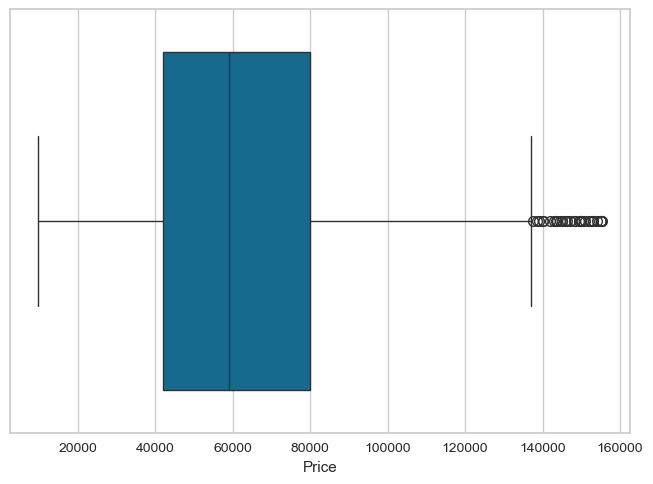

In [1660]:
sns.boxplot(x=df_selected["Price"])

In [1661]:
df_selected.head()

,brand,Price,Rating,processor_brand,processor_tier,ram_memory,primary_storage_type,primary_storage_capacity,gpu_brand,gpu_type,display_size,resolution_width,resolution_height,OS,year_of_warranty,is_touch_screen
0,21,23990,63,2,1,8,1,512,3,2,15.6,1920,1080,6,0,0
1,21,35990,67,2,3,16,1,1024,3,2,15.6,1920,1080,6,0,0
2,10,51100,73,0,12,8,1,512,0,1,15.6,1920,1080,6,0,0
3,0,39990,62,2,2,8,1,512,3,2,14.0,1920,1080,6,0,0
4,14,28580,62,0,11,8,1,512,0,2,15.6,1920,1080,6,0,0


##### Membuat Corelation Matrix

(16.5, -0.5)

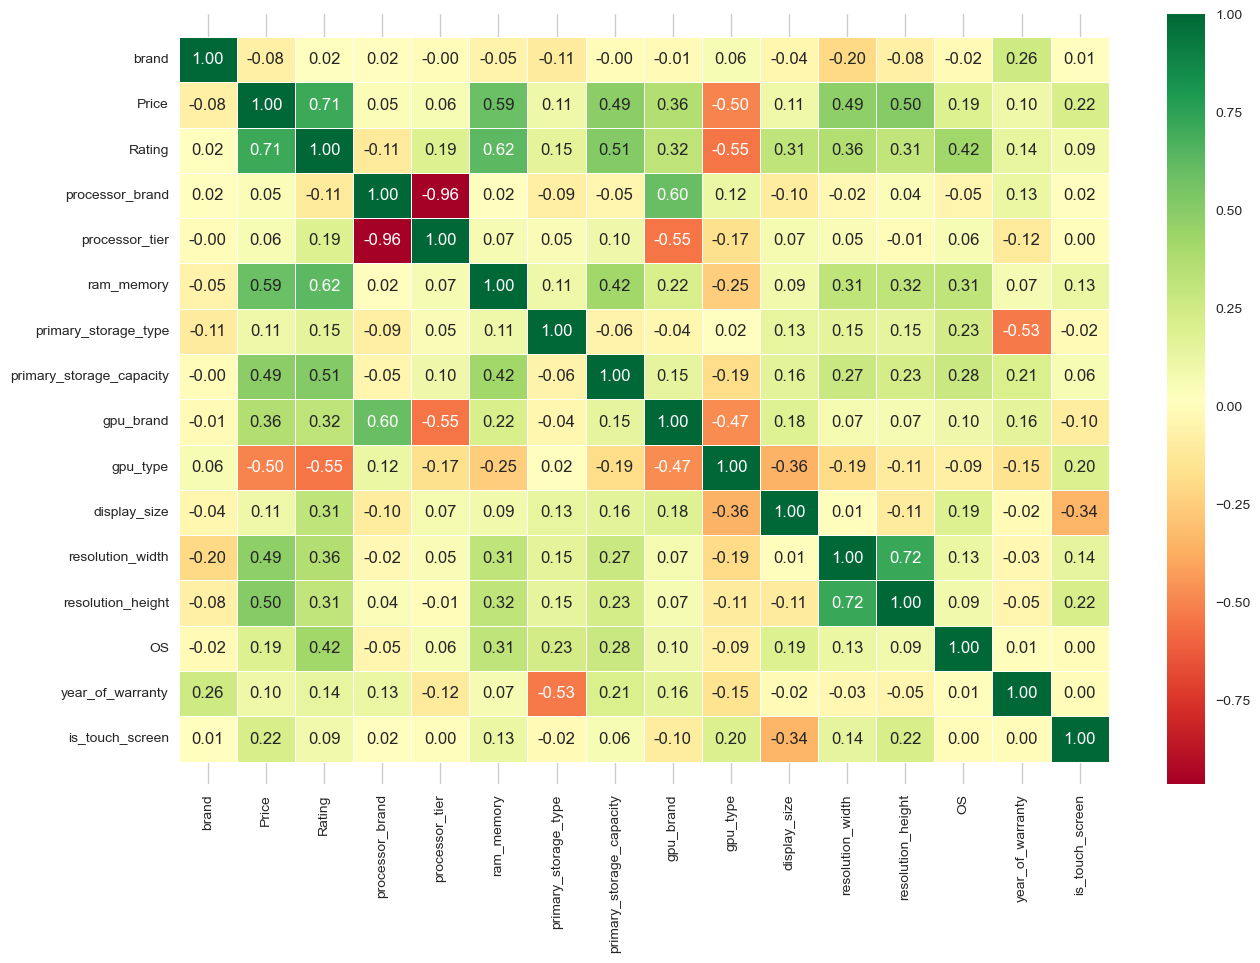

In [1663]:
corr_matrix = df_selected.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="RdYlGn");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [1664]:
len(df_selected)

920

In [1665]:
column = df_selected.columns
column

Index(['brand', 'Price', 'Rating', 'processor_brand', 'processor_tier',
       'ram_memory', 'primary_storage_type', 'primary_storage_capacity',
       'gpu_brand', 'gpu_type', 'display_size', 'resolution_width',
       'resolution_height', 'OS', 'year_of_warranty', 'is_touch_screen'],
      dtype='object')

#### scaling data
kita akan menggunakan `StandardScaller` untuk scaling data

StandardScaler adalah metode untuk melakukan **normalisasi** atau **standarisasi data**, yang membuatnya lebih mudah untuk digunakan dalam banyak algoritma machine learning

In [1667]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

mms = StandardScaler()
df_scaled = mms.fit_transform(df_selected)

In [1668]:
len(col), len(df_selected.columns)

(16, 16)

In [1669]:
# data_scaled = pd.DataFrame(data=df_scaled, columns=col)

data_scaled = pd.DataFrame(data=df_scaled, columns=column)

In [1705]:
data_scaled.head()

,brand,Price,Rating,processor_brand,processor_tier,ram_memory,primary_storage_type,primary_storage_capacity,gpu_brand,gpu_type,display_size,resolution_width,resolution_height,OS,year_of_warranty,is_touch_screen
0,2.017129,-1.336647,0.024761,0.629759,-0.834451,-0.990693,0.173883,-0.284638,0.183004,0.696637,0.511925,-0.107163,-0.290769,0.255725,-0.267659,-0.306489
1,2.017129,-0.942857,0.454576,0.629759,-0.408191,0.853389,0.173883,2.085199,0.183004,0.696637,0.511925,-0.107163,-0.290769,0.255725,-0.267659,-0.306489
2,0.208718,-0.447011,1.099299,-1.577398,1.509981,-0.990693,0.173883,-0.284638,-1.984767,-1.344464,0.511925,-0.107163,-0.290769,0.255725,-0.267659,-0.306489
3,-1.435293,-0.811594,-0.082693,0.629759,-0.621321,-0.990693,0.173883,-0.284638,0.183004,0.696637,-1.232009,-0.107163,-0.290769,0.255725,-0.267659,-0.306489
4,0.866322,-1.186022,-0.082693,-1.577398,1.296851,-0.990693,0.173883,-0.284638,-1.984767,0.696637,0.511925,-0.107163,-0.290769,0.255725,-0.267659,-0.306489


#### Menggunakan PCA untuk memeriksa seberapa baik cluster terpisah

PCA, atau Principal Component Analysis, adalah teknik dalam analisis data yang digunakan untuk menyederhanakan data dengan banyak dimensi menjadi lebih sedikit dimensi, tanpa kehilangan banyak informasi. Ini sangat berguna dalam situasi di mana data memiliki banyak variabel, dan kita ingin memahami struktur data dengan lebih mudah.

In [1673]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_trans = pca.fit_transform(data)
df_pca = pd.DataFrame(data=pca_trans, columns=['PCA1', 'PCA2'])
print("Explained variance ratio:", pca.explained_variance_ratio_)
df_pca.head()

Explained variance ratio: [9.99900562e-01 3.32744174e-05]


,PCA1,PCA2
0,-53276.897579,-55.540850
1,-41275.582029,-127.003519
2,-26167.254106,-26.990518
3,-37276.913203,263.905961
4,-48686.936357,-19.728097


### Evaluasi Model

In [1675]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
import warnings

# Abaikan semua warning
warnings.simplefilter("ignore")

In [1707]:
import os

# Handling Warning
os.environ['OMP_NUM_THREADS'] = '4'

## Cek Silhouette dan Elbow Method dari algoritma K-Means
**Elbow Method** adalah teknik yang digunakan untuk menentukan jumlah cluster yang optimal dalam algoritma clustering, seperti K-Means. Metode ini membantu memilih nilai K yang terbaik, yaitu jumlah cluster yang dapat membagi data dengan cara yang paling efektif.

In [1677]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = []
scores = []
for i in range(2, 11):
    km = KMeans(n_clusters=i, n_init=10, random_state=42)
    km.fit(df_pca)
    wcss.append(km.inertia_)

    labels = km.labels_
    silhouette_avg = silhouette_score(df_pca, labels)
    scores.append(silhouette_avg)
    
    # Format angka dengan dua desimal
    print(f'wcss score for n_clusters = {i} is {wcss[-1]:.2f}')
    print('='*60)
    print(f'silhouette score for n_clusters = {i} is {silhouette_avg:.2f}')


wcss score for n_clusters = 2 is 1193637449462.89
silhouette score for n_clusters = 2 is 0.75
wcss score for n_clusters = 3 is 617612026109.21
silhouette score for n_clusters = 3 is 0.62
wcss score for n_clusters = 4 is 372938791785.85
silhouette score for n_clusters = 4 is 0.56
wcss score for n_clusters = 5 is 239937756016.18
silhouette score for n_clusters = 5 is 0.56
wcss score for n_clusters = 6 is 164997122727.91
silhouette score for n_clusters = 6 is 0.56
wcss score for n_clusters = 7 is 120722641810.01
silhouette score for n_clusters = 7 is 0.56
wcss score for n_clusters = 8 is 92067194453.43
silhouette score for n_clusters = 8 is 0.54
wcss score for n_clusters = 9 is 73057385799.49
silhouette score for n_clusters = 9 is 0.55
wcss score for n_clusters = 10 is 57835657572.01
silhouette score for n_clusters = 10 is 0.55


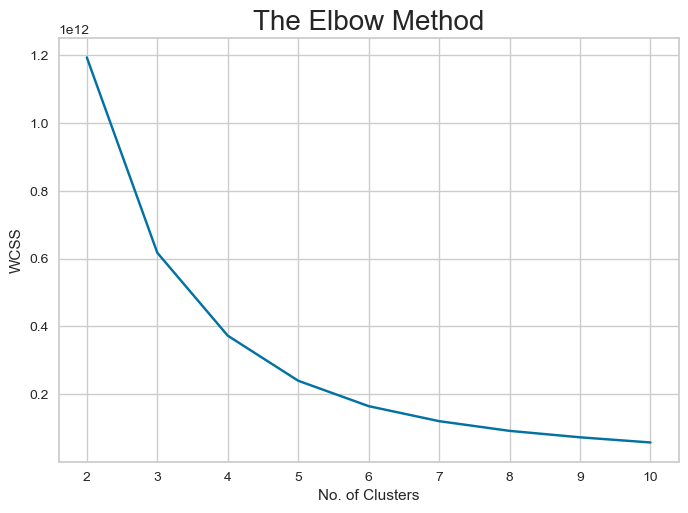

In [1678]:
# Visualisasi Elbow Method
plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

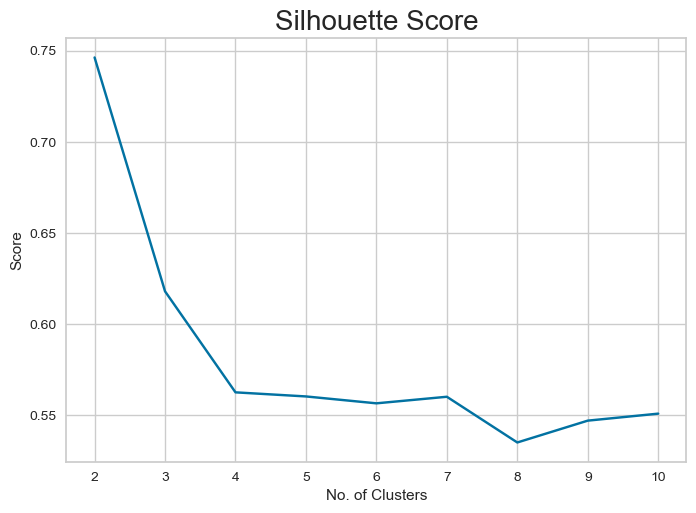

In [1679]:
# Visualisasi Silhouette Score
plt.plot(range(2, 11), scores)
plt.title('Silhouette Score', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Score')
plt.show()

## Hasil Plot Clustering 2 Dimensi

In [1680]:
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(df_pca)
centroids = kmeans.cluster_centers_

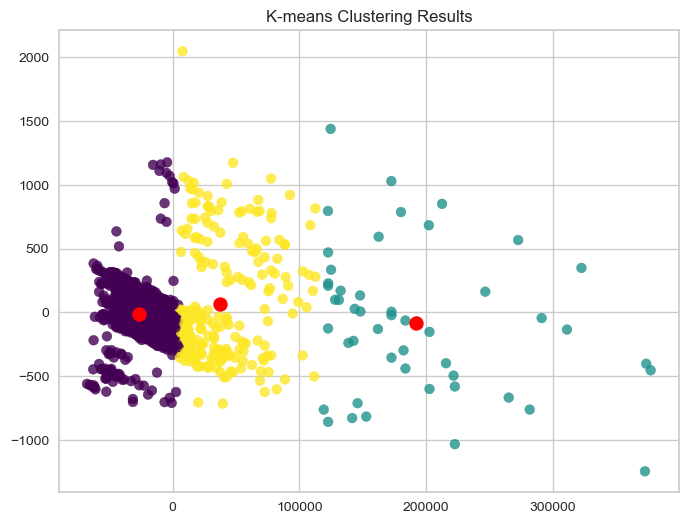

In [1681]:
plt.figure(figsize=(8, 6))

plt.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.8)

# Plot cluster centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='o', label='Centroids', s=100)
plt.title('K-means Clustering Results')
plt.show()

## Hasil Plot Clustering 3 Dimensi

In [1687]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_trans = pca.fit_transform(data)
df_pca = pd.DataFrame(data=pca_trans, columns=['PCA1', 'PCA2', 'PCA3'])
print("Explained variance ratio:", pca.explained_variance_ratio_)
df_pca.head()

Explained variance ratio: [9.99900562e-01 3.32744174e-05 2.53728390e-05]


,PCA1,PCA2,PCA3
0,-53276.897579,-55.540850,630.497160
1,-41275.582029,-127.003519,648.972117
2,-26167.254106,-26.990518,491.165629
3,-37276.913203,263.905961,284.615150
4,-48686.936357,-19.728097,576.614901


In [1698]:
import plotly.graph_objects as go
from sklearn.cluster import KMeans

# Fitting KMeans
kmeansmodel = KMeans(n_clusters=3, random_state=42).fit(df_pca)
y_kmeans = kmeansmodel.labels_

# Scatter plot untuk Cluster 1
trace1 = go.Scatter3d(
    x=df_pca.iloc[y_kmeans == 0, 0],
    y=df_pca.iloc[y_kmeans == 0, 1],
    z=df_pca.iloc[y_kmeans == 0, 2],
    mode='markers',
    marker=dict(size=8, color='red', opacity=0.8),
    name='Cluster 1'
)

# Scatter plot untuk Cluster 2
trace2 = go.Scatter3d(
    x=df_pca.iloc[y_kmeans == 1, 0],
    y=df_pca.iloc[y_kmeans == 1, 1],
    z=df_pca.iloc[y_kmeans == 1, 2],
    mode='markers',
    marker=dict(size=8, color='blue', opacity=0.8),
    name='Cluster 2'
)

# Scatter plot untuk Cluster 3
trace3 = go.Scatter3d(
    x=df_pca.iloc[y_kmeans == 2, 0],
    y=df_pca.iloc[y_kmeans == 2, 1],
    z=df_pca.iloc[y_kmeans == 2, 2],
    mode='markers',
    marker=dict(size=8, color='green', opacity=0.8),
    name='Cluster 3'
)

# Scatter plot untuk menampilkan centroid dari K-Means
centroids = go.Scatter3d(
    x=kmeansmodel.cluster_centers_[:, 0],
    y=kmeansmodel.cluster_centers_[:, 1],
    z=kmeansmodel.cluster_centers_[:, 2],
    mode='markers',
    marker=dict(size=12, color='black', symbol='diamond', opacity=1),
    name='Centroids'
)

# Membuat layout
layout = go.Layout(
    title='Hasil KMeans Clustering',
    scene=dict(
        xaxis_title='PCA1',
        yaxis_title='PCA2',
        zaxis_title='PCA3'
    ),
    showlegend=True
)

# Menggabungkan semua trace
fig = go.Figure(data=[trace1, trace2, trace3, centroids], layout=layout)

# Menampilkan plot interaktif
fig.show()


#### Dari Evaluasi Model yang sudah dilakukan bisa kita ketahui

In [1693]:
scores

[0.7463013948661189,
 0.6180462162126322,
 0.5626438237090987,
 0.5604032187533282,
 0.5566234171228223,
 0.5602250049029149,
 0.5351558657544182,
 0.5471293623326662,
 0.5509661033975191]

In [1695]:
print(f'Jadi Skor terbaik dari model kita adalah {max(scores)*100:.2f}')

Jadi Skor terbaik dari model kita adalah 74.63


# TERIMA KASIH !